In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 

In [2]:
xdata,ydata = make_classification(n_samples=1000, 
                    n_features=2, n_informative=2, n_redundant=0, n_classes=2, 
                    n_clusters_per_class=1, random_state=3)

In [3]:
print(xdata.shape)
print(ydata.shape)

(1000, 2)
(1000,)


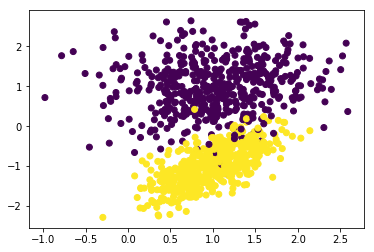

In [4]:
plt.scatter(xdata[:,0],xdata[:,1],c=ydata)
plt.show()

In [5]:
ones = np.ones([1000,1])
print(ones.shape)

xdata = np.hstack([ones,xdata])
print(xdata.shape)

(1000, 1)
(1000, 3)


# Logistic Regression

In [6]:
def hypothesis(theta,x):
    z = np.dot(x,theta)
    return 1/(1+np.exp(-z)) 
    
    
def likelihood(x,y,theta):
    m = x.shape[0]
    l = 0.0
    for ix in range(m):
        hx = hypothesis(theta,x[ix])
        l += y[ix]*np.log(hx) + (1-y[ix])*np.log(1-hx)
    return l
    

def grad(x,y,theta):
    
    m = x.shape[0]
    n = x.shape[1]
    grad = np.zeros([n,])
    
    for ix in range(m):
        for jx in range(n):
            hx = hypothesis(theta,x[ix])
            grad[jx] += (y[ix]-hx)*x[ix][jx]
            
    return grad/m


def gradientAscent(x,y,learning_rate=0.1,threshold=0.0004):
    m = x.shape[0]
    n = x.shape[1]
    
#     theta = np.random.randn(n,)
    theta = np.zeros([n,])
    ll = []
    
    for epoch in range(2000):
        
        g = grad(x,y,theta)
#         print(g.shape)
#         print(theta,g*learning_rate)
        theta = theta + learning_rate*g
#         print(theta)
        ll.append(likelihood(x,y,theta))    
        
    return theta,ll  
    

In [7]:
theta,ll = gradientAscent(xdata,ydata) 

In [8]:
print(theta)

[-1.51826059  0.95093804 -5.00251494]


In [47]:
def pred(xtest,theta):
    
    m = xtest.shape[0]
    ypred = []
    
    for ix in range(m):
        hx = hypothesis(theta,xtest[ix])
        if(hx>=0.5):
            ypred.append(1)
        else:
            ypred.append(0)
    return ypred
    

# Visualization

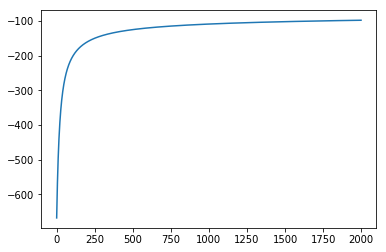

In [11]:
plt.plot(ll)
plt.show()

(10,)


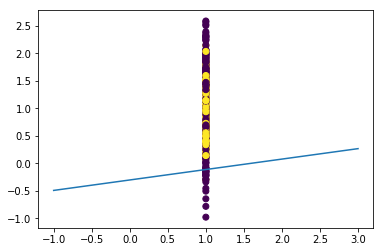

In [10]:
plt.scatter(xdata[:,0],xdata[:,1],c=ydata)
x1 = np.linspace(-1,3,10)
print(x1.shape)
x2 = (0-theta[0]-theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

# Sklearn

In [54]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(xdata, ydata)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
clf.intercept_

array([-2.39414228])

In [58]:
clf.coef_

array([[ 1.62289947, -5.19245405]])

In [60]:
skltheta = [clf.intercept_[0],clf.coef_[0,0],clf.coef_[0,1]]
print(skltheta)

[-2.3941422792381326, 1.622899471470745, -5.1924540472053708]


(10,)


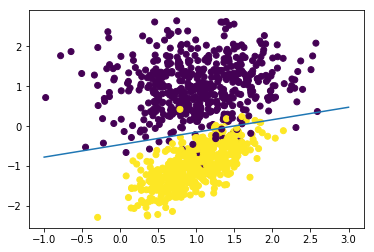

In [61]:
plt.scatter(xdata[:,0],xdata[:,1],c=ydata)
x1 = np.linspace(-1,3,10)
print(x1.shape)
x2 = (0-skltheta[0]-skltheta[1]*x1)/skltheta[2]
plt.plot(x1,x2)
plt.show()